In [6]:
import torch

# Load the wrapper
wrapper = torch.hub.load("mohwald/gandtr", "hedngan", pretrained=True)

# Inspect available attributes
print(dir(wrapper))


Using cache found in /home/i2v/.cache/torch/hub/mohwald_gandtr_main


['EVAL', 'NetworkParams', 'TRAIN', '__abstractmethods__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_generate_graph_for_input', '_generate_network_graph', 'const_data', 'device', 'eval', 'forward', 'forward_batch', 'freeze', 'frozen', 'initialize', 'initialize_from_state', 'initialize_wrappers', 'meta', 'model', 'network_params', 'overlay_model', 'overlay_params', 'parameters', 'set_meta', 'stage', 'state_dict', 'train', 'train_data', 'transform', 'wrappers']


In [ ]:
import torch
from PIL import Image

# Load model
model = torch.hub.load('mohwald/gandtr', 'gem_vgg16_hedngan')

# Load and preprocess image
with open("data/test/oxford5k/jpg/all_souls_000000.jpg", 'rb') as f:
    image = Image.open(f).convert("RGB")
inputs = model.transform(image).unsqueeze(0)

# Forward pass
with torch.no_grad():
    vec = model(inputs)

print(f"Type: {type(vec)}")
if isinstance(vec, torch.Tensor):
    print(f"Shape: {vec.shape}")
    print(vec)
elif isinstance(vec, dict):
    for k, v in vec.items():
        print(f"{k}: type={type(v)}, shape={getattr(v, 'shape', None)}")


Using cache found in /home/i2v/.cache/torch/hub/mohwald_gandtr_main


In [4]:
import torch
from PIL import Image
import torchvision.transforms as T

def augment_day_to_night(image_path, output_path=None,
                         model_type="hedngan", device="cuda"):
    """
    Convert a daytime image into a synthetic nighttime image.
    Uses the internal `model` attribute from the loaded wrapper.
    """
    # Load GAN wrapper
    wrapper = torch.hub.load("mohwald/gandtr", model_type, pretrained=True)
    # Extract the internal generator network
    generator = wrapper.model.to(device).eval()

    # Preprocessing: resize/crop suitable for your use case
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])

    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output_tensor = generator(input_tensor)

    # Denormalize and convert to PIL image
    out = ((output_tensor.squeeze(0).cpu() * 0.5) + 0.5).clamp(0, 1)
    night_img = T.ToPILImage()(out)

    
    return night_img




In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "assets/image.png"
day_img = Image.open(img_path).convert("RGB")

night_img = augment_day_to_night(
        img_path,
        model_type="hedngan",
        device="cuda"  # or "cpu"
    )

Using cache found in /home/i2v/.cache/torch/hub/mohwald_gandtr_main


In [13]:
print(type(day_img))
print(type(night_img))

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


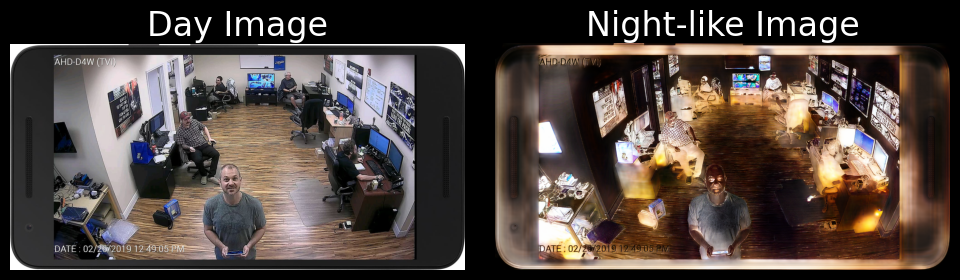

In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(np.asarray(day_img.convert("RGB")))
axes[0].set_title("Day Image")
axes[0].axis("off")

axes[1].imshow(np.asarray(night_img.convert("RGB")))
axes[1].set_title("Night-like Image")
axes[1].axis("off")

fig.tight_layout()
plt.show()
